In [103]:
from Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [104]:
BTC_daily = pd.read_csv('BTC-USDT_daily.csv')
BTC_daily

performance = pd.read_csv('benchmark_performance.csv')
performance

# columns = ["symbol", "month"]
# result = pd.DataFrame(columns=columns)
btc = performance[performance["sym.2"] == "BTC"]
btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)
btc = btc.reset_index(drop=True)
btc

<ipython-input-104-0929bff7feb8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)


,month,returns.2
0,2017.08,0.108744
1,2017.09,-0.066394
2,2017.10,0.476080
3,2017.11,0.522352
4,2017.12,0.394364
...,...,...
76,2023.12,0.120868
77,2024.01,0.007010
78,2024.02,0.435674
79,2024.03,0.166021


In [105]:
strategy = Investment(file_name=BTC_daily, ticker='BTC/USDT')

In [106]:
strategy.daily_inside_candle_strategy_long_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1)

# strategy.daily_inside_candle_strategy_long_reference_loss(end_date="2024-03-31")

# strategy.daily_inside_candle_strategy_long_ema_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1, ema=20)

# strategy.daily_inside_candle_strategy_long_short_win_loss_ratio(end_date="2024-03-31", loss=0.06, ratio=8)

# strategy.daily_inside_candle_strategy_long_ema_reference_loss(end_date="2024-03-31", ema=20)

date: 2017-08-28 00:00:00, price: 4353.65, stop_win: 4484.2595, stop_loss: 4223.040499999999
date: 2017-09-18 00:00:00, price: 4060.0, stop_win: 4181.8, stop_loss: 3938.2
date: 2017-09-25 00:00:00, price: 3928.0, stop_win: 4045.84, stop_loss: 3810.16
date: 2017-10-07 00:00:00, price: 4425.0, stop_win: 4557.75, stop_loss: 4292.25
date: 2017-10-29 00:00:00, price: 6133.01, stop_win: 6317.000300000001, stop_loss: 5949.0197
date: 2017-11-25 00:00:00, price: 8700.04, stop_win: 8961.041200000001, stop_loss: 8439.0388
date: 2017-12-15 00:00:00, price: 17516.81, stop_win: 18042.314300000002, stop_loss: 16991.3057
date: 2018-01-05 00:00:00, price: 16960.39, stop_win: 17469.2017, stop_loss: 16451.578299999997
date: 2018-02-09 00:00:00, price: 8683.93, stop_win: 8944.447900000001, stop_loss: 8423.4121
date: 2018-04-03 00:00:00, price: 7405.21, stop_win: 7627.366300000001, stop_loss: 7183.0536999999995
date: 2018-04-12 00:00:00, price: 7922.99, stop_win: 8160.6797, stop_loss: 7685.3003
date: 2018-

In [107]:
strategy.stockAccount.get_strategy_info()

{'average_return_per_trade': -0.1973731866546357,
 'accumulated_return': -29.34660443095407,
 'win_ratio': 48.91304347826087,
 'max_win': 9.563267122645925,
 'max_loss': -12.308851872376882,
 'total_trade': 92}

In [108]:
strategy.stockAccount.get_transaction() # transactions

[{'ticker': 'BTC/USDT',
  'date': Timestamp('2017-08-29 00:00:00'),
  'price': 4353.65,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-08-30 00:00:00'),
  'price': 4564.52,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-19 00:00:00'),
  'price': 4060.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-20 00:00:00'),
  'price': 3910.04,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-26 00:00:00'),
  'price': 3928.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-28 00:00:00'),
  'price': 4192.11,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-10-08 00:00:00'),
  'price': 4425.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-10-09 00:00:00'),
  'price': 4640.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-10-30 

In [109]:
def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

df_pls = pls_visualize(strategy.stockAccount.get_pls())
df_pls

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-08-30,4564.52,True,210.87,4.843522
1,BTC/USDT,2017-09-19,4060.00,2017-09-20,3910.04,True,-149.96,-3.693596
2,BTC/USDT,2017-09-26,3928.00,2017-09-28,4192.11,True,264.11,6.723778
3,BTC/USDT,2017-10-08,4425.00,2017-10-09,4640.00,True,215.00,4.858757
4,BTC/USDT,2017-10-30,6133.01,2017-11-01,6463.00,True,329.99,5.380555
...,...,...,...,...,...,...,...,...
87,BTC/USDT,2024-01-09,46951.04,2024-01-13,42782.74,True,-4168.30,-8.877972
88,BTC/USDT,2024-01-27,41823.51,2024-01-30,43302.71,True,1479.20,3.536767
89,BTC/USDT,2024-02-08,44349.60,2024-02-10,47132.78,True,2783.18,6.275547
90,BTC/USDT,2024-03-05,68245.71,2024-03-06,63724.01,True,-4521.70,-6.625618


In [110]:
accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result.insert(2, "BTC_return", [None for i in range(len(result))], True)

result

,date,pl_percent,BTC_return
0,2017-08-29,4.843522,None
1,2017-09-19,0.971026,None
2,2017-09-26,7.760094,None
3,2017-10-08,12.995895,None
4,2017-10-30,19.075701,None
...,...,...,...
87,2024-01-09,-34.212206,None
88,2024-01-27,-31.885445,None
89,2024-02-08,-27.610884,None
90,2024-03-05,-32.407110,None


In [111]:
# btc['month'] = pd.to_datetime(btc['month'], format="%Y.%m")

btc['month'] = btc['month'].astype(str)

for i in range(len(btc)):
    if btc.iloc[i]['month'].endswith(".1"):
        btc.at[i, 'month'] = btc.iloc[i]['month'] + "0"
        
btc['month'] = pd.to_datetime(btc['month'], format="%Y.%m")

btc


,month,returns.2
0,2017-08-01,0.108744
1,2017-09-01,-0.066394
2,2017-10-01,0.476080
3,2017-11-01,0.522352
4,2017-12-01,0.394364
...,...,...
76,2023-12-01,0.120868
77,2024-01-01,0.007010
78,2024-02-01,0.435674
79,2024-03-01,0.166021


In [112]:
accumulated_percent = 1

for i in range(len(btc)):
    accumulated_percent *= (btc.iloc[i]['returns.2']/100) + 1
    # row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    btc.at[btc.index[i], 'returns.2'] = (accumulated_percent - 1) * 100
    # result.loc[len(result.index)] = row

btc


,month,returns.2
0,2017-08-01,0.108744
1,2017-09-01,0.042278
2,2017-10-01,0.518559
3,2017-11-01,1.043619
4,2017-12-01,1.442099
...,...,...
76,2023-12-01,4.167069
77,2024-01-01,4.174371
78,2024-02-01,4.628231
79,2024-03-01,4.801936


In [113]:
for i in range(len(result)):
    for j in range(len(btc)):
        # datetime.datetime.strptime()
        if result.iloc[i]['date'].year == btc.iloc[j]['month'].year and result.iloc[i]['date'].month == btc.iloc[j]['month'].month:
            result.at[result.index[i], 'BTC_return'] = btc.iloc[j]['returns.2'] * 100
            break
result   
    

,date,pl_percent,BTC_return
0,2017-08-29,4.843522,10.874391
1,2017-09-19,0.971026,4.227783
2,2017-09-26,7.760094,4.227783
3,2017-10-08,12.995895,51.855876
4,2017-10-30,19.075701,51.855876
...,...,...,...
87,2024-01-09,-34.212206,417.437093
88,2024-01-27,-31.885445,417.437093
89,2024-02-08,-27.610884,462.823111
90,2024-03-05,-32.407110,480.193581


(17407.0, 19793.0)

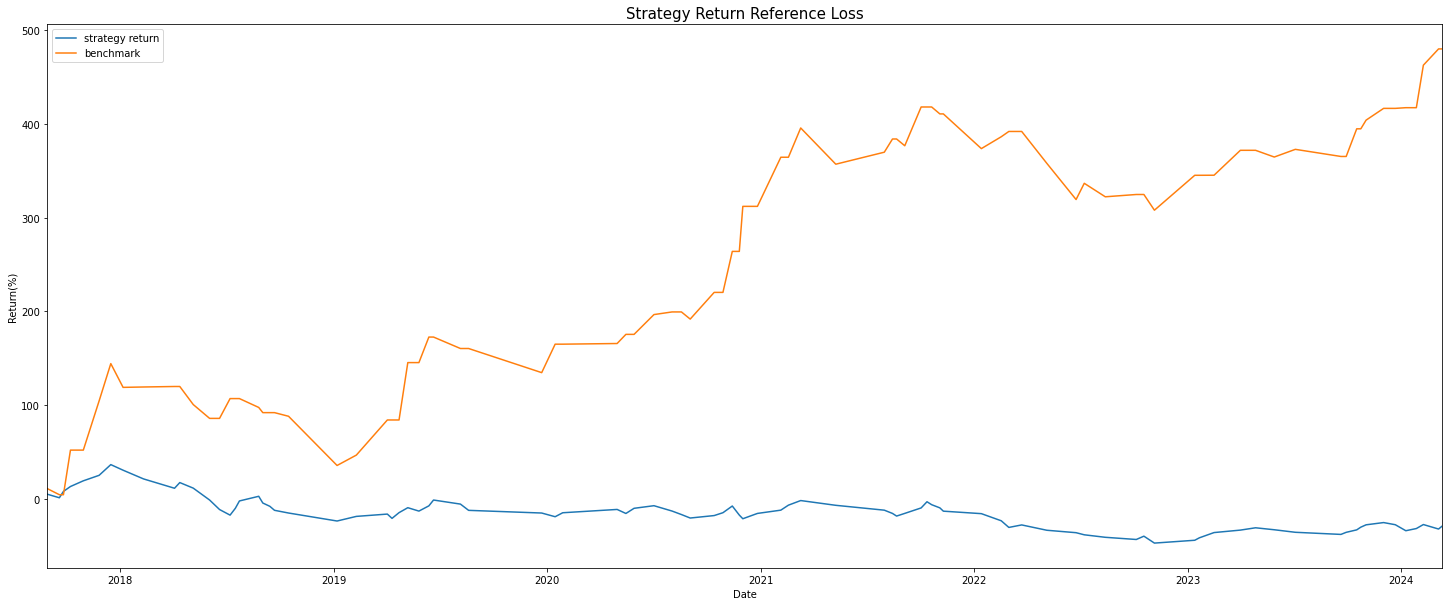

In [114]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="strategy return")
plt.plot(result['date'], result['BTC_return'], label="benchmark")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01']
# plt.xticks(ticks)

In [115]:
# df_pls.tail(50)
df_pls.head(50)

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-08-30,4564.52,True,210.87,4.843522
1,BTC/USDT,2017-09-19,4060.00,2017-09-20,3910.04,True,-149.96,-3.693596
2,BTC/USDT,2017-09-26,3928.00,2017-09-28,4192.11,True,264.11,6.723778
3,BTC/USDT,2017-10-08,4425.00,2017-10-09,4640.00,True,215.00,4.858757
4,BTC/USDT,2017-10-30,6133.01,2017-11-01,6463.00,True,329.99,5.380555
5,BTC/USDT,2017-11-26,8700.04,2017-11-27,9128.00,True,427.96,4.919058
6,BTC/USDT,2017-12-16,17516.81,2017-12-17,19120.19,True,1603.38,9.153379
7,BTC/USDT,2018-01-06,16960.39,2018-01-08,16218.85,True,-741.54,-4.372187
8,BTC/USDT,2018-02-10,8683.93,2018-02-12,8063.82,True,-620.11,-7.140891
9,BTC/USDT,2018-04-04,7405.21,2018-04-05,6796.10,True,-609.11,-8.225425


In [122]:
x = strategy.file_name
# x.head(50)
x = x.loc['2017-10-02': '2024-03-11']
x.tail(50)

,open,high,low,close,volume,max_value,min_value,signal,signal_diff,buyORsell
date,,,,,,,,,,
2024-01-22,41580.32,41689.65,39431.58,39568.02,55426.199110,41689.65,39431.58,0,-3,-1
2024-01-23,39568.02,40176.74,38555.00,39897.60,57956.633510,41689.65,39431.58,1,1,0
2024-01-24,39897.59,40555.00,39484.19,40084.88,39293.828610,41689.65,39431.58,2,1,0
2024-01-25,40084.89,40300.24,39550.00,39961.09,31022.118530,41689.65,39431.58,3,1,0
2024-01-26,39961.09,42246.82,39822.52,41823.51,47384.967260,42246.82,39822.52,0,-3,1
2024-01-27,41823.51,42200.00,41394.34,42120.63,16224.416670,42246.82,39822.52,1,1,0
2024-01-28,42120.63,42842.68,41620.81,42031.06,27294.998380,42246.82,39822.52,2,1,0
2024-01-29,42031.05,43333.00,41804.88,43302.70,31542.742070,43333.0,41804.88,0,-2,0
2024-01-30,43302.71,43882.36,42683.99,42941.10,37619.245460,43333.0,41804.88,1,1,0


In [117]:
x = x[x['buyORsell']==1]
x

,open,high,low,close,volume,max_value,min_value,signal,signal_diff,buyORsell
date,,,,,,,,,,
2017-10-07,4369.00,4479.50,4312.56,4423.00,297.597500,4479.5,4312.56,0,-6,1
2017-10-29,5709.98,6189.88,5648.01,6169.98,1804.778173,6189.88,5648.01,0,-4,1


In [118]:
len(x)

2

In [119]:
# win = 0
# loss = 0
# for i in strategy.stockAccount.get_pls():
#     if i['pl_percent'] > 0:
#         win += 1
#     else:
#         loss += 1

# print(win)
# print(loss)
# print((win / loss) * 100)

- Stoploss
    - +3% -3%
    - 2:1, 3:1...
    - reference loss
- Entry
    - non-technical
    - technical
        - EMA/SMA
- Daily/4-Hourly/Hourly
- Long + short (future)